In [37]:
# Import Dependencies
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

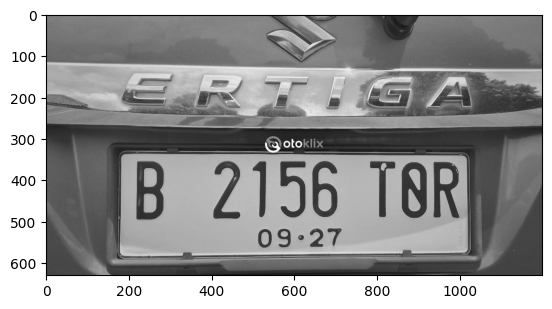

In [38]:
# Read Image, Grayscale
img = cv2.imread('static/image/g1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

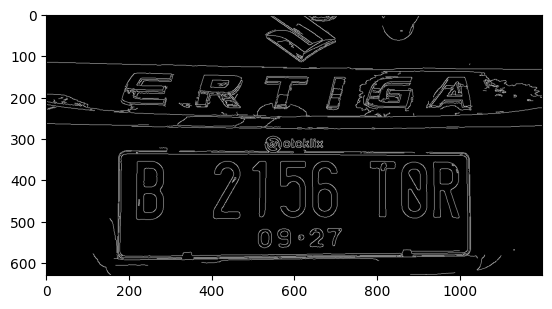

In [39]:
# Apply Filter and Find Edges for Localization
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise Reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [40]:
# Find Contours
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [41]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [42]:
location

array([[[ 182,  343]],

       [[ 181,  584]],

       [[1020,  568]],

       [[1012,  342]]], dtype=int32)

In [43]:
# Apply Mask
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255,-1)
new_image = cv2.bitwise_and(img, img, mask=mask)

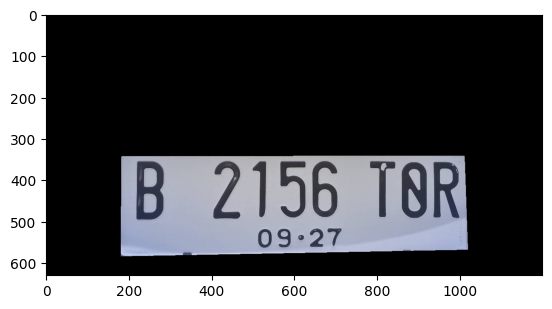

In [44]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [45]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

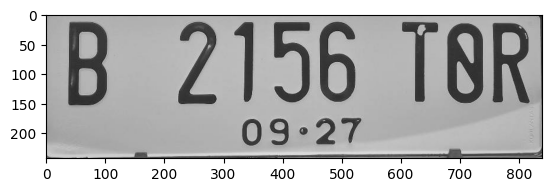

In [46]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [47]:
# EasyOCR to Read Text
reader = easyocr.Reader(['id'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[29, 15], [117, 15], [117, 155], [29, 155]], 'B', 0.7412778946266805),
 ([[208, 0], [546, 0], [546, 168], [208, 168]], '2156', 0.626895768972151),
 ([[589, 0], [839, 0], [839, 163], [589, 163]], 'TOR', 0.8248217516237017),
 ([[326, 164], [541, 164], [541, 231], [326, 231]],
  '09 27',
  0.8421069288216331)]

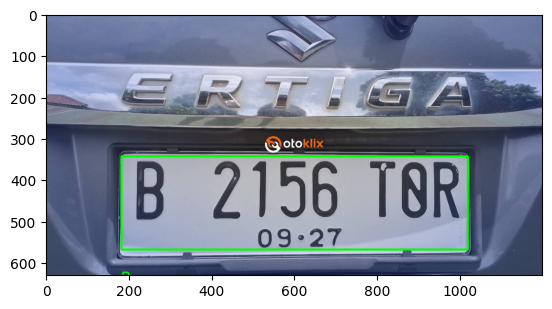

In [48]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))